Dipole fields
=============

This example showcases how to calculate and visualize magnetic fields generated by magnetic dipoles. In FusionSC, the dipoles are specified with a finite radius. The magnetic field is calculate as the field of a magnetized sphere of the given radius and total moment (which, outside the sphere, is identical to the magnetic dipole field).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [68]:
# Calculate and plot the field of a set of magnetized spheres
# Takes as input tuples of (x, y, r)
def plotSpheres(spheres):
    for x, y, r, mul in spheres:
        angles = np.radians(np.linspace(0, 360, 360))

        xPlot = r * np.cos(angles) + x
        yPlot = r * np.sin(angles) + y

        plt.plot(xPlot, yPlot, color = 'black')

def sphereField(spheres, moment):
    from fusionsc.magnetics import MagneticConfig
    
    x, y, r, mul = zip(*spheres)
    zeros = 0 * x
    xyz = [x, y, 0 * np.asarray(x)]
    moments = np.asarray([moment] * len(x)) * np.asarray(mul)[:, None]
    moments = moments.T
    
    return MagneticConfig.fromDipoles(xyz, moments, r)

def plotFields(spheres, moment, w, n = 100, **kwargs):
    ax = np.linspace(-w, w, n)
    x, y = np.meshgrid(
        ax,
        ax
    )

    z = 0 * x

    field = sphereField(spheres, moment)
    Bx, By, Bz = field.evaluateXyz([x, y, z])

    c = np.sqrt(Bx**2 + By**2)

    plt.streamplot(ax, ax, Bx, By, color = c, **kwargs)
    plt.colorbar()
    plt.axis('equal')
    plt.xlim(-w, w)
    plt.ylim(-w, w)

def plotAll(spheres, moment, w, n = 40, **kwargs):
    plotSpheres(spheres)
    plotFields(spheres, moment, w, n, **kwargs)

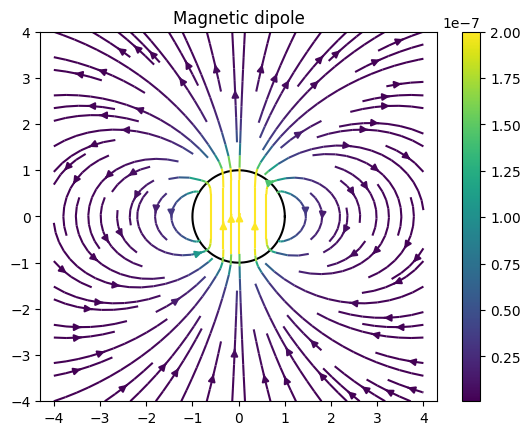

In [77]:
plt.title("Magnetic dipole")

spheres = [
    [0,0,1,1]
]
moment = (0, 1, 0)
plotAll(
    spheres,
    moment,
    4
)

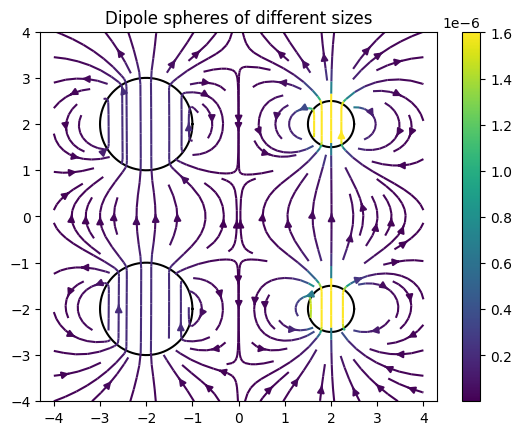

In [78]:
plt.title("Dipole spheres of different sizes")

spheres = [
    [-2,-2,1,1],
    [-2, 2,1,1],
    [2,-2,0.5,1],
    [2,2,0.5,1],
]
moment = (0, 1, 0)
plotAll(
    spheres,
    moment,
    4,
    n = 100
)

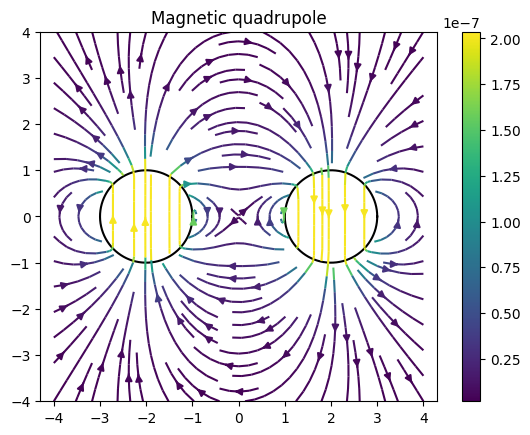

In [79]:
plt.title("Magnetic quadrupole")

spheres = [
    [-2,0,1,1],
    [2,0,1,-1],
]
moment = (0, 1, 0)
plotAll(
    spheres,
    moment,
    4,
    n = 100
)